In [1]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [2]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22endovascular+grafts%22%5Btiab&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [4]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') 
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22endovascular+grafts%22%5Btiab&filter=years.2015-2023'
# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 15):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                 Title  \
0    Anaesthesia for vascular emergencies - a state...   
1    Branched and Fenestrated Aortic Endovascular G...   
2    Fenestrated Physician-Modified Endovascular Gr...   
3    Potential of Superhydrophobic Surface for Bloo...   
4    In vitro hemocompatibility testing of medical ...   
..                                                 ...   
132  Aortic Arch Anatomy Pattern in Patients Treate...   
133  Fibrin-associated EBV-positive Large B-Cell Ly...   
134  Covered Stent Implantation for Treatment of Il...   
135  A patient with lower extremity weakness after ...   
136  Pseudoaneurysm as a Late Complication of Chron...   

                                               Authors  \
0    Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                                Atkins AD, Atkins MD.   
2    Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                     Wu XH, Liew YK, Mai CW, Then YY.   
4            

In [7]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 137


In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [9]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [10]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/36308289
https://pubmed.ncbi.nlm.nih.gov/36910555
https://pubmed.ncbi.nlm.nih.gov/37752861
https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.ncbi.nlm.nih.gov/33989208
https://pubmed.ncbi.nlm.nih.gov/31154869
https://pubmed.ncbi.nlm.nih.gov/35640582
https://pubmed.ncbi.nlm.nih.gov/37031086
https://pubmed.ncbi.nlm.nih.gov/25899978
https://pubmed.ncbi.nlm.nih.gov/27760246
https://pubmed.ncbi.nlm.nih.gov/32017130
https://pubmed.ncbi.nlm.nih.gov/26543044
https://pubmed.ncbi.nlm.nih.gov/31009709
https://pubmed.ncbi.nlm.nih.gov/29224942
https://pubmed.ncbi.nlm.nih.gov/33740880
https://pubmed.ncbi.nlm.nih.gov/32554200
https://pubmed.ncbi.nlm.nih.gov/31645219
https://pubmed.ncbi.nlm.nih.gov/30815758
https://pubmed.ncbi.nlm.nih.gov/32812621
https://pubmed.ncbi.nlm.nih.gov/37256782
https://pubmed.ncbi.nlm.nih.gov/28044355
https://pubmed.ncbi.nlm.nih.gov/35030287
https://pubmed.ncbi.nlm.nih.gov/31403404
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/36308289',
 'https://pubmed.ncbi.nlm.nih.gov/36910555',
 'https://pubmed.ncbi.nlm.nih.gov/37752861',
 'https://pubmed.ncbi.nlm.nih.gov/33805207',
 'https://pubmed.ncbi.nlm.nih.gov/32698094',
 'https://pubmed.ncbi.nlm.nih.gov/33989208',
 'https://pubmed.ncbi.nlm.nih.gov/31154869',
 'https://pubmed.ncbi.nlm.nih.gov/35640582',
 'https://pubmed.ncbi.nlm.nih.gov/37031086',
 'https://pubmed.ncbi.nlm.nih.gov/25899978',
 'https://pubmed.ncbi.nlm.nih.gov/27760246',
 'https://pubmed.ncbi.nlm.nih.gov/32017130',
 'https://pubmed.ncbi.nlm.nih.gov/26543044',
 'https://pubmed.ncbi.nlm.nih.gov/31009709',
 'https://pubmed.ncbi.nlm.nih.gov/29224942',
 'https://pubmed.ncbi.nlm.nih.gov/33740880',
 'https://pubmed.ncbi.nlm.nih.gov/32554200',
 'https://pubmed.ncbi.nlm.nih.gov/31645219',
 'https://pubmed.ncbi.nlm.nih.gov/30815758',
 'https://pubmed.ncbi.nlm.nih.gov/32812621',
 'https://pubmed.ncbi.nlm.nih.gov/37256782',
 'https://pubmed.ncbi.nlm.nih.gov/28044355',
 'https://

In [11]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
#print(pmids_list)

In [12]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)

1 Department of Anesthesiology and Pain Medicine, University of Ottawa, ON, Canada., 2 Division of Vascular Surgery, Department of Surgery, University of Ottawa, ON, Canada., 3 Department of Critical Care, The Ottawa Hospital, University of Ottawa, ON, Canada.
1 Texas A&M University Department of Biomedical Engineering, College Station, Texas, US., 2 Houston Methodist DeBakey Cardiovascular Surgery Associates, Houston, Texas, US.
1 Department of Thoracic and Vascular Surgery, Arnaud de Villeneuve Hospital, Montpellier, France., 2 Department of Vascular and Endovascular Surgery, University Hospital of the Andes, Las Condes, Chile., 3 Physiology and Experimental Medicine of the Heart and Muscles, University of Montpellier, CNRS, INSERM, CHU Montpellier, Montpellier, France.
1 School of Postgraduate Studies, International Medical University, Kuala Lumpur 57000, Malaysia., 2 Department of Life Sciences, School of Pharmacy, International Medical University, Kuala Lumpur 57000, Malaysia., 3 

In [13]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)

                                                 Title  \
0    Anaesthesia for vascular emergencies - a state...   
1    Branched and Fenestrated Aortic Endovascular G...   
2    Fenestrated Physician-Modified Endovascular Gr...   
3    Potential of Superhydrophobic Surface for Bloo...   
4    In vitro hemocompatibility testing of medical ...   
..                                                 ...   
132  Aortic Arch Anatomy Pattern in Patients Treate...   
133  Fibrin-associated EBV-positive Large B-Cell Ly...   
134  Covered Stent Implantation for Treatment of Il...   
135  A patient with lower extremity weakness after ...   
136  Pseudoaneurysm as a Late Complication of Chron...   

                                               Authors  \
0    Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                                Atkins AD, Atkins MD.   
2    Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                     Wu XH, Liew YK, Mai CW, Then YY.   
4            

In [14]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Anaesthesia for vascular emergencies - a state...,"Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...",Anaesthesia. 2023 Feb;78(2):236-246. doi: 10.1...,PMID: 36308289,2023,1 Department of Anesthesiology and Pain Medici...,,\n\n\n \n Anaesthesia for vascular...
1,Branched and Fenestrated Aortic Endovascular G...,"Atkins AD, Atkins MD.",Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...,PMID: 36910555,2023,1 Texas A&M University Department of Biomedica...,,\n\n\n \n Outcomes of fenestrated ...
2,Fenestrated Physician-Modified Endovascular Gr...,"Bacri C, Chastant R, Chassin-Trubert L, Hirech...",J Endovasc Ther. 2023 Sep 27:15266028231202234...,PMID: 37752861,2023,"1 Department of Thoracic and Vascular Surgery,...",,No cited by information found
3,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,"1 School of Postgraduate Studies, Internationa...",,\n\n\n \n Combating medical device...
4,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,"1 Department of Biology, University of Hradec ...",,\n\n\n \n [Considerations on in vi...
...,...,...,...,...,...,...,...,...
132,Aortic Arch Anatomy Pattern in Patients Treate...,"Chassin-Trubert L, Gandet T, Ozdemir BA, Loune...",J Endovasc Ther. 2020 Oct;27(5):785-791. doi: ...,PMID: 32495679,2020,"1 Department of Thoracic and Vascular Surgery,...",,\n\n\n \n Double homemade fenestra...
133,Fibrin-associated EBV-positive Large B-Cell Ly...,"Boyer DF, McKelvie PA, de Leval L, Edlefsen KL...",Am J Surg Pathol. 2017 Mar;41(3):299-312. doi:...,PMID: 28195879,2017,"1 *Department of Pathology, University of Mich...",,\n\n\n \n Epstein-Barr virus-posit...
134,Covered Stent Implantation for Treatment of Il...,"Landolff Q, Sebag F, Costanzo A, Honton B, Ama...",JACC Case Rep. 2020 Jun 17;2(6):894-897. doi: ...,PMID: 34317376,2020,"1 Department of Cardiology, Institut Mutualist...",,\n\n\n \n Delayed left atrial appe...
135,A patient with lower extremity weakness after ...,"West JR, Keller CS, Lombardi J.",Am J Emerg Med. 2020 Apr;38(4):851.e1-851.e3. ...,PMID: 31839520,2020,"1 Lincoln Medical Center, Department of Emerge...",,\n\n\n \n Outcomes of abdominal ao...


In [15]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Anaesthesia for vascular emergencies - a state...   
1    Branched and Fenestrated Aortic Endovascular G...   
2    Fenestrated Physician-Modified Endovascular Gr...   
3    Potential of Superhydrophobic Surface for Bloo...   
4    In vitro hemocompatibility testing of medical ...   
..                                                 ...   
132  Aortic Arch Anatomy Pattern in Patients Treate...   
133  Fibrin-associated EBV-positive Large B-Cell Ly...   
134  Covered Stent Implantation for Treatment of Il...   
135  A patient with lower extremity weakness after ...   
136  Pseudoaneurysm as a Late Complication of Chron...   

                                               Authors  \
0    Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                                Atkins AD, Atkins MD.   
2    Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                     Wu XH, Liew YK, Mai CW, Then YY.   
4            

In [16]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Anaesthesia for vascular emergencies - a state...   
1    Branched and Fenestrated Aortic Endovascular G...   
2    Fenestrated Physician-Modified Endovascular Gr...   
3    Potential of Superhydrophobic Surface for Bloo...   
4    In vitro hemocompatibility testing of medical ...   
..                                                 ...   
132  Aortic Arch Anatomy Pattern in Patients Treate...   
133  Fibrin-associated EBV-positive Large B-Cell Ly...   
134  Covered Stent Implantation for Treatment of Il...   
135  A patient with lower extremity weakness after ...   
136  Pseudoaneurysm as a Late Complication of Chron...   

                                               Authors  \
0    Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                                Atkins AD, Atkins MD.   
2    Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                     Wu XH, Liew YK, Mai CW, Then YY.   
4            

In [17]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Anaesthesia for vascular emergencies - a state...,"Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...",Anaesthesia. 2023 Feb;78(2):236-246. doi: 10.1...,PMID: 36308289,2023,1 Department of Anesthesiology and Pain Medici...,Anaesthesia for vascular emergencies.\n \...
1,Branched and Fenestrated Aortic Endovascular G...,"Atkins AD, Atkins MD.",Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...,PMID: 36910555,2023,1 Texas A&M University Department of Biomedica...,Outcomes of fenestrated and branched endovascu...
2,Fenestrated Physician-Modified Endovascular Gr...,"Bacri C, Chastant R, Chassin-Trubert L, Hirech...",J Endovasc Ther. 2023 Sep 27:15266028231202234...,PMID: 37752861,2023,"1 Department of Thoracic and Vascular Surgery,...",No cited by information found
3,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,"1 School of Postgraduate Studies, Internationa...",Combating medical device fouling.\n \n ...
4,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,"1 Department of Biology, University of Hradec ...",[Considerations on in vitro and in vivo magnet...
...,...,...,...,...,...,...,...
132,Aortic Arch Anatomy Pattern in Patients Treate...,"Chassin-Trubert L, Gandet T, Ozdemir BA, Loune...",J Endovasc Ther. 2020 Oct;27(5):785-791. doi: ...,PMID: 32495679,2020,"1 Department of Thoracic and Vascular Surgery,...",Double homemade fenestrated stent graft for to...
133,Fibrin-associated EBV-positive Large B-Cell Ly...,"Boyer DF, McKelvie PA, de Leval L, Edlefsen KL...",Am J Surg Pathol. 2017 Mar;41(3):299-312. doi:...,PMID: 28195879,2017,"1 *Department of Pathology, University of Mich...",Epstein-Barr virus-positive diffuse large B-ce...
134,Covered Stent Implantation for Treatment of Il...,"Landolff Q, Sebag F, Costanzo A, Honton B, Ama...",JACC Case Rep. 2020 Jun 17;2(6):894-897. doi: ...,PMID: 34317376,2020,"1 Department of Cardiology, Institut Mutualist...",Delayed left atrial appendage contrast filling...
135,A patient with lower extremity weakness after ...,"West JR, Keller CS, Lombardi J.",Am J Emerg Med. 2020 Apr;38(4):851.e1-851.e3. ...,PMID: 31839520,2020,"1 Lincoln Medical Center, Department of Emerge...",Outcomes of abdominal aortic aneurysm with aor...


In [18]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [19]:
# Specify the full path
file_path= r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\Hemolysis_Endovascular_Grafts.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

In [1]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Endovascular_Grafts.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Anaesthesia for vascular emergencies - a state...   
1  Branched and Fenestrated Aortic Endovascular G...   
2  Fenestrated Physician-Modified Endovascular Gr...   
3  Potential of Superhydrophobic Surface for Bloo...   
4  In vitro hemocompatibility testing of medical ...   

                                             Authors  \
0  Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                              Atkins AD, Atkins MD.   
2  Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                   Wu XH, Liew YK, Mai CW, Then YY.   
4                                     Nalezinková M.   

                                             Journal            PMID  \
0  Anaesthesia. 2023 Feb;78(2):236-246. doi: 10.1...  PMID: 36308289   
1  Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...  PMID: 36910555   
2  J Endovasc Ther. 2023 Sep 27:15266028231202234...  PMID: 37752861   
3  Int J Mol Sci. 2021 Mar 24;22(7):33

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             137 non-null    object
 1   Authors           137 non-null    object
 2   Journal           137 non-null    object
 3   PMID              137 non-null    object
 4   Publication_year  137 non-null    int64 
 5   Affiliations      137 non-null    object
 6   Cited_By          137 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.6+ KB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64

In [7]:
# Let's inspect the first few entries in the 'Affiliations' column to understand the format
df['Affiliations'].head()

0    1 Department of Anesthesiology and Pain Medici...
1    1 Texas A&M University Department of Biomedica...
2    1 Department of Thoracic and Vascular Surgery,...
3    1 School of Postgraduate Studies, Internationa...
4    1 Department of Biology, University of Hradec ...
Name: Affiliations, dtype: object

In [8]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv(r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Endovascular_Grafts.csv')

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Finding the maximum number of affiliations for a single publication
max_affiliations_per_publication = split_affiliations.apply(len).max()
print(max_affiliations_per_publication)

11


In [9]:
# Calculating the length of each list in the split affiliations
affiliations_lengths = split_affiliations.apply(len)

# Finding the index of the row with the maximum number of affiliations
max_affiliations_index = affiliations_lengths.idxmax()

# Extracting the title of the publication with the maximum number of affiliations
publication_with_max_affiliations = df.loc[max_affiliations_index, 'Title']
publication_with_max_affiliations

'Multi-component cord blood banking: a proof-of-concept international exercise.'

In [10]:
import pandas as pd
import re

# Load the original dataset
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_Endovascular_Grafts.csv'
df = pd.read_csv(file_path)

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Find the maximum number of affiliations
max_affiliations = max(split_affiliations.apply(len))

# Creating new columns for each affiliation
for i in range(max_affiliations):
    df[f'Affiliation_{i+1}'] = split_affiliations.apply(lambda x: x[i] if i < len(x) else '')

# Drop the original 'Affiliations' column
df.drop('Affiliations', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
output_file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_Endovascular_Grafts.csv' 
df.to_csv(output_file_path, index=False)


In [11]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_Endovascular_Grafts.csv' 

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Anaesthesia for vascular emergencies - a state...   
1  Branched and Fenestrated Aortic Endovascular G...   
2  Fenestrated Physician-Modified Endovascular Gr...   
3  Potential of Superhydrophobic Surface for Bloo...   
4  In vitro hemocompatibility testing of medical ...   

                                             Authors  \
0  Boucher N, Dreksler H, Hooper J, Nagpal S, Mir...   
1                              Atkins AD, Atkins MD.   
2  Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
3                   Wu XH, Liew YK, Mai CW, Then YY.   
4                                     Nalezinková M.   

                                             Journal            PMID  \
0  Anaesthesia. 2023 Feb;78(2):236-246. doi: 10.1...  PMID: 36308289   
1  Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...  PMID: 36910555   
2  J Endovasc Ther. 2023 Sep 27:15266028231202234...  PMID: 37752861   
3  Int J Mol Sci. 2021 Mar 24;22(7):33

In [12]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


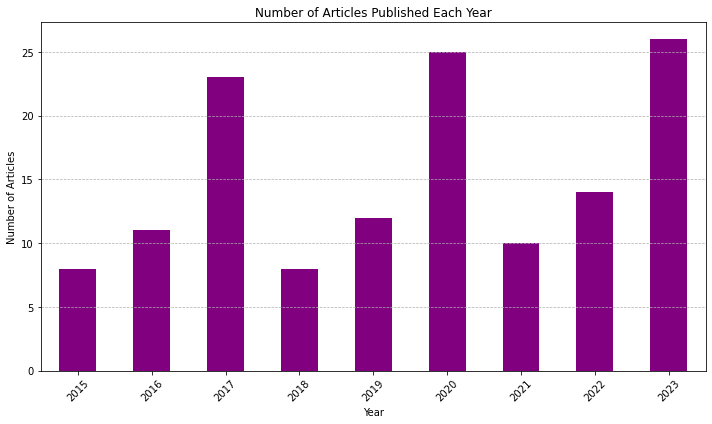

Publication_year
2015     8
2016    11
2017    23
2018     8
2019    12
2020    25
2021    10
2022    14
2023    26
dtype: int64

In [15]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

J Vasc Surg                           15
Artif Organs                           8
ACS Appl Mater Interfaces              7
J Endovasc Ther                        6
Ann Vasc Surg                          6
ASAIO J                                6
J Mater Chem B                         5
Biomech Model Mechanobiol              4
J Biomed Mater Res B Appl Biomater     4
J Biomed Mater Res A                   3
Name: Cleaned_Journal, dtype: int64

In [16]:
#Questions 3 Which affiliations or institutions have the highest number of publications?
import pandas as pd

# Concatenate all affiliation columns into a single Series
all_affiliations = pd.Series()
for i in range(1, max_affiliations_per_publication + 1):
    all_affiliations = all_affiliations.append(df[f'Affiliation_{i}'])

# Clean and standardize the affiliations, if necessary
# For example: trimming whitespace, converting to lowercase, etc.
# all_affiliations = all_affiliations.str.strip().str.lower()

# Count the frequency of each affiliation
affiliation_counts = all_affiliations.value_counts()

# Display the top affiliations
top_affiliations = affiliation_counts.head(10)  
top_affiliations


<ipython-input-16-ffc805f34e91>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  all_affiliations = pd.Series()


2 Division of Vascular Surgery, Department of Surgery, University of Washington, Seattle, Wash.                                                                                                                                                                                                                                               2
No affiliations found                                                                                                                                                                                                                                                                                                                         2
2 Department of Mechanical Engineering, Tecnun, University of Navarra, Paseo Manuel de Lardizabal, 13, 20018 San Sebastián, Spain. Electronic address: ranton@tecnun.es                                                                                                                                                                 

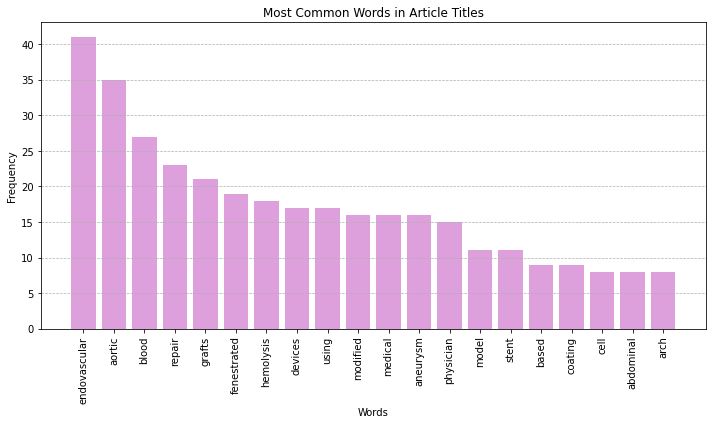

[('endovascular', 41),
 ('aortic', 35),
 ('blood', 27),
 ('repair', 23),
 ('grafts', 21),
 ('fenestrated', 19),
 ('hemolysis', 18),
 ('devices', 17),
 ('using', 17),
 ('modified', 16),
 ('medical', 16),
 ('aneurysm', 16),
 ('physician', 15),
 ('model', 11),
 ('stent', 11),
 ('based', 9),
 ('coating', 9),
 ('cell', 8),
 ('abdominal', 8),
 ('arch', 8)]

In [18]:
# Questions 4: "What are the most common themes or keywords present in the article titles?"

from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and split into tokens
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# List of English stop words
stop_words = set([
    'the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'by', 'an', 'as', 'at',
    'from', 'is', 'that', 'its', 'it', 'this', 'these', 'are', 'was', 'were', 'which', 'or'
])

# Tokenize the titles and remove stop words
titles = df['Title']
tokens = [word for title in titles for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words), color='plum')
plt.title('Most Common Words in Article Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common words and their counts
most_common_words

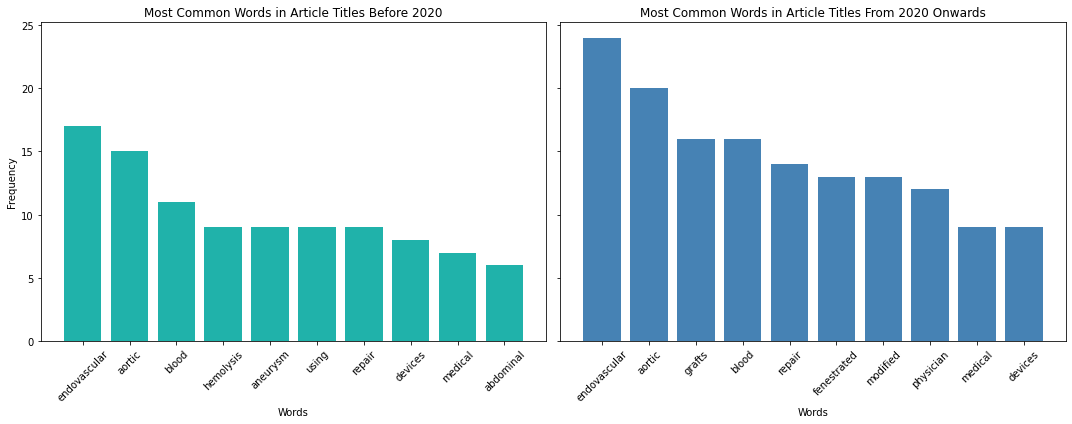

([('endovascular', 17),
  ('aortic', 15),
  ('blood', 11),
  ('hemolysis', 9),
  ('aneurysm', 9),
  ('using', 9),
  ('repair', 9),
  ('devices', 8),
  ('medical', 7),
  ('abdominal', 6)],
 [('endovascular', 24),
  ('aortic', 20),
  ('grafts', 16),
  ('blood', 16),
  ('repair', 14),
  ('fenestrated', 13),
  ('modified', 13),
  ('physician', 12),
  ('medical', 9),
  ('devices', 9)])

In [19]:
# Questions 5: "Are there emerging topics or trends in recent years?"


# perform the same analysis with the variable named 'df'
# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020_df = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards_df = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020_df = Counter(tokens_before_2020_df)
word_counts_from_2020_onwards_df = Counter(tokens_from_2020_onwards_df)

# Get the most common words for each period
most_common_words_before_2020_df = word_counts_before_2020_df.most_common(10)
most_common_words_from_2020_onwards_df = word_counts_from_2020_onwards_df.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020_df), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards_df), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
# axes[1].set_ylabel('Frequency')  # Y-axis is shared, so no need to set again
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020_df, most_common_words_from_2020_onwards_df)

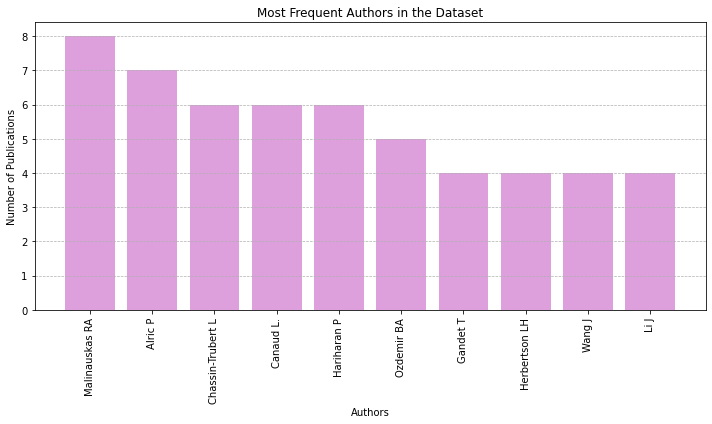

[('Malinauskas RA', 8),
 ('Alric P', 7),
 ('Chassin-Trubert L', 6),
 ('Canaud L.', 6),
 ('Hariharan P', 6),
 ('Ozdemir BA', 5),
 ('Gandet T', 4),
 ('Herbertson LH', 4),
 ('Wang J', 4),
 ('Li J', 4)]

In [20]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='plum')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

In [21]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations

[(('Alric P', 'Canaud L'), 7),
 (('Alric P', 'Chassin-Trubert L'), 6),
 (('Canaud L', 'Chassin-Trubert L'), 6),
 (('Alric P', 'Ozdemir BA'), 5),
 (('Canaud L', 'Ozdemir BA'), 5),
 (('Alric P', 'Gandet T'), 5),
 (('Canaud L', 'Gandet T'), 5),
 (('Hariharan P', 'Malinauskas RA'), 5),
 (('Chassin-Trubert L', 'Ozdemir BA'), 4),
 (('Chassin-Trubert L', 'Gandet T'), 4)]

<ipython-input-23-cee2c2dec8d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-23-cee2c2dec8d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


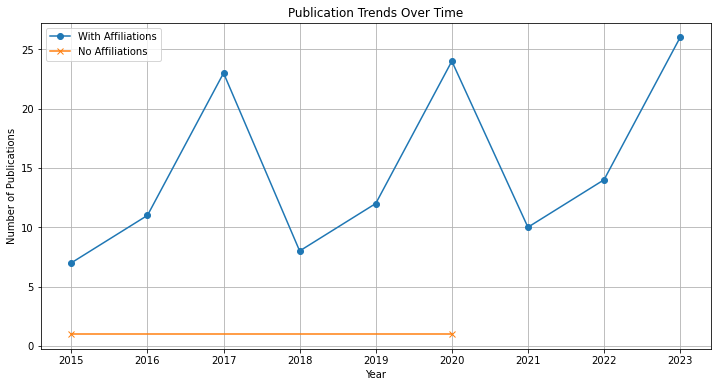

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a condition to check if all affiliation columns are empty or contain 'no affiliations found'
no_affiliations_condition = df['Affiliation_1'].str.lower().str.contains('no affiliations found')
for i in range(2, max_affiliations_per_publication + 1):
    no_affiliations_condition &= df[f'Affiliation_{i}'].str.lower().str.contains('no affiliations found', na=True)

# Separate the dataset into two subsets
df_with_affiliations = df[~no_affiliations_condition]
df_no_affiliations = df[no_affiliations_condition]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()